In [58]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math

In [59]:
#-------------------------------------
# Begin Function Declarations
#-------------------------------------

In [60]:
def junction_widths(arr):
    junctionWidths = []
    for i in range(len(arr)//2):
        junctionWidths.append(arr[2*i+1] - arr[2*i])
    return junctionWidths

In [61]:
def even_arrayOfWidths_noInput(sigma, numOfJunctions, width):
    delta = 4 / (numOfJunctions + 2) * sigma**2
    arrayOfWidths = np.zeros(numOfJunctions)
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2)
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 1):
        arrOfWidthsDiv2[i - 1] = np.sqrt(i * delta)
    arrayOfWidths = np.concatenate((np.flip(-1 * arrOfWidthsDiv2), arrOfWidthsDiv2))
    minimum = min(arrayOfWidths)
    for i in range (len(arrayOfWidths)):
        arrayOfWidths[i] -= (minimum - width)
    return arrayOfWidths

def even_arrayOfWidths_withInput(sigma, numOfJunctions, arrayJ):
    arrayOfWidths = np.zeros(numOfJunctions)
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2)
    junctionWidths = junction_widths(arrayJ)
    input_sigma = np.std(junctionWidths)
    delta = 4 / (numOfJunctions + 2) * (sigma + input_sigma)**2
    # If standard deviation is 0 and the inputted array is custom, return the array
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 1):
        arrOfWidthsDiv2[i - 1] = np.sqrt(i * delta)
    arrayOfWidths = np.concatenate((np.flip(-1 * arrOfWidthsDiv2), arrOfWidthsDiv2))
    minimum = min(arrayOfWidths)
    for i in range (len(arrayOfWidths)):
        arrayOfWidths[i] -= (minimum - min(junctionWidths))
    return arrayOfWidths  

In [62]:
# For Even Junctions

def EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfJunctions =  np.zeros(numOfJunctions * 2)
    arrayOfWidths = []
    if (sigma == 0 and len(arrayJ) != 0):
        return arrayJ
    if (len(arrayJ) != 0):
        arrayOfWidths = even_arrayOfWidths_withInput(sigma, len(arrayJ)//2, arrayJ)
    else:
        arrayOfWidths = even_arrayOfWidths_noInput(sigma, numOfJunctions, width)
    # If the user inputted a custom array
    if (len(arrayJ) != 0):
        numOfJunctions = len(arrayJ)//2
        arrOfJunctions = np.zeros(2 * numOfJunctions)
        rannum = int(random.randint(0, numOfJunctions - 1))
        arr = np.zeros(numOfJunctions)
        arrOfJunctions[1] = arrayOfWidths[rannum]
        arr[rannum] = 1
        for k in range(2, 2*numOfJunctions - 2,2):
            junctionCenter = (arrayJ[k] + arrayJ[k+1])/2
            while(arr[rannum] == 1):
                rannum = int(random.randint(0, numOfJunctions - 1))
            arrOfJunctions[k] = junctionCenter - (arrayOfWidths[rannum]/2)
            arrOfJunctions[k + 1] = junctionCenter + (arrayOfWidths[rannum]/2) # Even "expansion" of the junctions
            arr[rannum] = 1
        for i in range(numOfJunctions):
                if (arr[i] == 0):
                    arrOfJunctions[-2] = 1 - arrayOfWidths[i]
                    arrOfJunctions[-1] = 1
                    break
    else:
        rannum = int(random.randint(0, numOfJunctions - 1))
        arr = np.zeros(numOfJunctions)
        arrOfJunctions[1] = arrayOfWidths[rannum]
        arr[rannum] = 1
        for k in range(2, 2*numOfJunctions - 2,2):
            while(arr[rannum] == 1):
                rannum = int(random.randint(0, numOfJunctions - 1))
            arrOfJunctions[k] = k//2 * junctionCenter - (arrayOfWidths[rannum]/2)
            arrOfJunctions[k + 1] = k//2 * junctionCenter + (arrayOfWidths[rannum]/2)
            arr[rannum] = 1

        for i in range(numOfJunctions):
            if (arr[i] == 0):
                arrOfJunctions[-2] = 1 - arrayOfWidths[i]
                arrOfJunctions[-1] = 1
                break
    
    return arrOfJunctions

In [63]:
def odd_arrayOfWidths_noInput(sigma, numOfJunctions, width):
    delta = (4 * numOfJunctions * sigma**2)/((numOfJunctions - 1) * (numOfJunctions + 1))
    arrayOfWidths = np.zeros(numOfJunctions)
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2 + 1)
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 2):
        arrOfWidthsDiv2[i - 1] = np.sqrt((i-1) * delta)
    arrayOfWidths = np.concatenate((np.flip(-1 * arrOfWidthsDiv2[1:]), arrOfWidthsDiv2))
    minimum = min(arrayOfWidths)
    for i in range (len(arrayOfWidths)):
        arrayOfWidths[i] -= (minimum - width)
    return arrayOfWidths

def odd_arrayOfWidths_withInput(sigma, numOfJunctions, arrayJ):
    numOfJunctions = len(arrayJ)//2
    arrayOfWidths = np.zeros(numOfJunctions)
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2 + 1)
    junctionWidths = junction_widths(arrayJ)
    input_sigma = np.std(junctionWidths)
    delta = (4 * numOfJunctions * (sigma + input_sigma)**2)/((numOfJunctions - 1) * (numOfJunctions + 1))
    # If standard deviation is 0 and the inputted array is custom, return the array
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 2):
        arrOfWidthsDiv2[i - 1] = np.sqrt((i-1) * delta)
    arrayOfWidths = np.concatenate((np.flip(-1 * arrOfWidthsDiv2[1:]), arrOfWidthsDiv2))
    minimum = min(arrayOfWidths)
    for i in range (len(arrayOfWidths)):
        arrayOfWidths[i] -= (minimum - min(junctionWidths))
    return arrayOfWidths 

In [64]:
# For Odd Junctions

def OddArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfJunctions =  np.zeros(numOfJunctions * 2)
    arrayOfWidths = []
    if (sigma == 0 and len(arrayJ) != 0):
        return arrayJ
    if (len(arrayJ) != 0):
        arrayOfWidths = odd_arrayOfWidths_withInput(sigma, len(arrayJ)//2, arrayJ)
    else:
        arrayOfWidths = odd_arrayOfWidths_noInput(sigma, numOfJunctions, width)
        
    if (len(arrayJ) != 0):
        numOfJunctions = len(arrayJ)//2
        arrOfJunctions = np.zeros(2 * numOfJunctions)
        rannum = int(random.randint(0, numOfJunctions - 1))
        arr = np.zeros(numOfJunctions)
        arrOfJunctions[1] = arrayOfWidths[rannum]
        arr[rannum] = 1
        for k in range(2, 2*numOfJunctions - 2,2):
            junctionCenter = (arrayJ[k] + arrayJ[k+1])/2
            while(arr[rannum] == 1):
                rannum = int(random.randint(0, numOfJunctions - 1))
            arrOfJunctions[k] = junctionCenter - (arrayOfWidths[rannum]/2)
            arrOfJunctions[k + 1] = junctionCenter + (arrayOfWidths[rannum]/2) # Even "expansion" of the junctions
            arr[rannum] = 1
        for i in range(numOfJunctions):
                if (arr[i] == 0):
                    arrOfJunctions[-2] = 1 - arrayOfWidths[i]
                    arrOfJunctions[-1] = 1
                    break
    else:
        rannum = int(random.randint(0, numOfJunctions - 1))
        arr = np.zeros(numOfJunctions)
        arrOfJunctions[1] = arrayOfWidths[rannum]
        arr[rannum] = 1
        for k in range(2, 2*numOfJunctions - 2,2):
            while(arr[rannum] == 1):
                rannum = int(random.randint(0, numOfJunctions - 1))
            arrOfJunctions[k] = k//2 * junctionCenter - (arrayOfWidths[rannum]/2)
            arrOfJunctions[k + 1] = k//2 * junctionCenter + (arrayOfWidths[rannum]/2)
            arr[rannum] = 1

        for i in range(numOfJunctions):
            if (arr[i] == 0):
                arrOfJunctions[-2] = 1 - arrayOfWidths[i]
                arrOfJunctions[-1] = 1
                break
    return arrOfJunctions

In [65]:
def current(B, arrJ, arrC, y, numOfSegments): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    for n in range(limit):
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [66]:
def ArrayOfJunctions(sigma, numOfJunctions, width, arrayJ):
    if (numOfJunctions % 2 == 0):
        return EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ)
    else:
        return OddArrayOfJunctions(sigma, numOfJunctions, width, arrayJ)

# Prints out the # of junctions and the mean space occupied by the junctions
def stateOfArray(arrJ):
    state = []
    state.append(len(arrJ)//2)
    mean = 0
    for i in range(len(arrJ)//2):
        mean += (arrJ[2*i + 1] - arrJ[2*i])
    state.append(mean/(len(arrJ)//2))
    return state

# Prints out the percentage occupied by the non-current flowing areas
def meanOfArray(arrJ):
    percentage = 0
    for i in range(len(arrJ) // 2):
        percentage += (arrJ[2 * i + 1] - arrJ[2 * i]) / 2
    return  1 - percentage

# Checks whether junctions in the outputted array overlap with each other
def checkArray(arrJ):
    arr = arrJ.copy()
    if not np.array_equal(arr, sorted(arr)):
        for i in range (len(arr)):
            if (arr[i] < 0):
                arr[i] = -1* arr[i]
        if arr[1] > arr[2]:
            arr[1] = arr[2]
        for i in range(2, len(arr)//2 - 1):
            if arr[2 * i + 1] > arr[2 * i + 2]: # If the left end of the junction is greater than the right end of the adjacent junction
                arr[2*i + 1] = arr[2*i + 2]
            if arr[2 * i] > arr[2 * i + 1]: # If the left end of the junction is greater than the right end
                arr[2 * i] = arr[2 * i - 1]
        for i in range (2, len(arr)//2):
            if (arr[2*i] < arr[2*i - 1]):
                arr[2*i] = arr[2*i - 1]
        arr.sort()
    return arr

def maxCurrent(B, arrayJ, arrayC, segments): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma, segments))
    return max(dummyArray)

def array_to_python_syntax(arr):
    if not arr.any():
        return "[]"

    result = "["
    for item in arr:
        if isinstance(item, str):
            result += f"'{item}', "
        else:
            result += f"{item}, "
    
    # Remove the trailing comma and space
    result = result[:-2]
    result += "]"
    return result


In [67]:
def criticalCurrent(density, arrJ):
    criticalCurrents = []
    junctionWidths = []
    for i in range(len(arrJ)//2):
        junctionWidths.append(arrJ[2*i+1] - arrJ[2*i])
    for i in range (len(junctionWidths)):
        criticalCurrents.append(junctionWidths[i] * density[i])
    return criticalCurrents, junctionWidths

In [68]:
#-------------------------------------
# End Function Declarations
#-------------------------------------

In [69]:
import random

def generate_random_numbers(n):
    random_numbers = [random.random() for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
num_of_junctions = 100
random_numbers = np.sort(generate_random_numbers(2 * num_of_junctions))
random_numbers[0] = 0
random_numbers[-1] = 1

In [70]:
#-------------------------------------
# Begin Variable Declarations
#-------------------------------------

limit = 10 if (num_of_junctions < 5) else num_of_junctions * 2

FluxField = np.linspace(-1 * limit, limit, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

#----------------------------------

arrayOfJunctions = []

# arrayOfJunctions = [0, 0.001, 0.3, 0.33, 0.9, 1]

# arrayOfJunctions = [0, 0.02, 0.5, 0.55, 0.99, 1]

# [0.03, 0.02]

# arrayOfJunctions = random_numbers

# arrayOfJunctions = [0, 0.01, 0.03, 0.13, 0.14, 0.142, 0.16, 0.36, 0.38, 0.68, 0.681, 0.688, 0.7, 0.75, 0.77, 0.83, 0.84, 0.841, 0.89, 1]

# arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1]

# arrayOfJunctions = [0, 0.02, 0.99, 1]

number_of_junctions = 2

inputted_mean_width = 0.001

junctionNumber = stateOfArray(arrayOfJunctions)[0] if (len(arrayOfJunctions) != 0) else number_of_junctions

meanWidth = stateOfArray(arrayOfJunctions)[1] if (len(arrayOfJunctions) != 0) else 0.001

critical_currents_density = np.ones(int(junctionNumber)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

#----------------------------------

IMaxPointSigma1 = []

IMaxPointSigma2 = []

IMaxPointSigma3 = []

#----------------------------------

Sigma1 = 0

arraySigma1 = checkArray(ArrayOfJunctions(Sigma1, junctionNumber, meanWidth, arrayOfJunctions))

converted_1 = array_to_python_syntax(arraySigma1)

percentageSigma1 = meanOfArray(arraySigma1)

criticalCurrent_1, junction_width_1 = criticalCurrent(critical_currents_density, arraySigma1)

numOfSegments_1 = 5 if max(junction_width_1) < 0.1 else max(junction_width_1)//1 * 50 


#----------------------------------

Sigma2 = 0.01

arraySigma2 = checkArray(ArrayOfJunctions(Sigma2, junctionNumber, meanWidth, arrayOfJunctions))

converted_2 = array_to_python_syntax(arraySigma2)

percentageSigma2 = meanOfArray(arraySigma2)

criticalCurrent_2, junction_width_2 = criticalCurrent(critical_currents_density, arraySigma2)

numOfSegments_2 = 5 if max(junction_width_2) < 0.1 else max(junction_width_2)//1 * 50 

#----------------------------------

Sigma3 = 0.02

arraySigma3 = checkArray(ArrayOfJunctions(Sigma3, junctionNumber, meanWidth, arrayOfJunctions))

converted_3 = array_to_python_syntax(arraySigma3)

percentageSigma3 = meanOfArray(arraySigma3)

criticalCurrent_3, junction_width_3 = criticalCurrent(critical_currents_density, arraySigma3)

numOfSegments_3 = 5 if max(junction_width_3) < 0.1 else max(junction_width_3)//1 * 50 

#--------------------------------------------------

norm_1 = np.sum(criticalCurrent_1)

norm_2 = np.sum(criticalCurrent_2)

norm_3 = np.sum(criticalCurrent_3)



In [71]:
for f in FluxField:
    IMaxPointSigma1.append(maxCurrent(f, arraySigma1, criticalCurrent_1, numOfSegments_1)/norm_1) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)
print(arraySigma1)
for f in FluxField:
    IMaxPointSigma2.append(maxCurrent(f, arraySigma2, criticalCurrent_2, numOfSegments_2)/norm_2)
print(arraySigma2)
for f in FluxField:
    IMaxPointSigma3.append(maxCurrent(f, arraySigma3, criticalCurrent_3, numOfSegments_3)/norm_3)
print(arraySigma3)

[0.    0.001 0.999 1.   ]
[0.    0.021 0.999 1.   ]
[0.    0.001 0.959 1.   ]


In [72]:
# Save data
def create_folder(repository_path, folder_name):
    folder_path = os.path.join(repository_path, folder_name)
    
    # Check if the folder already exists
    if not os.path.exists(folder_path):
        # Create the folder
        os.makedirs(folder_path)
        print(f"Folder '{folder_name}' created successfully.")
    else:
        print(f"Folder '{folder_name}' already exists.")

directory = 'node_lifting_plots/'
chaos = '[NON-CHAOTIC]'
std = np.std(junction_width_1)
rounded_std = round(std, -int(math.floor(math.log10(abs(std))) - 1))
if (len(arrayOfJunctions) != 0):
    chaos = f'[CHAOTIC]_{rounded_std}'
    
folder_name = f'{chaos} {len(junction_width_1)} junctions'


create_folder(directory,folder_name=folder_name)

Folder '[NON-CHAOTIC] 2 junctions' already exists.


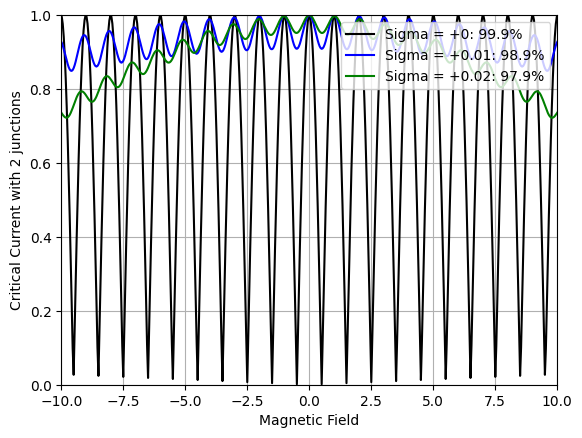

In [73]:
plt.figure(300)
plt.plot(FluxField, IMaxPointSigma1, 'black' , label="Sigma = +" + str(Sigma1) + ": " + str(round(percentageSigma1 * 100, 2)) + "%")
plt.plot(FluxField, IMaxPointSigma2, 'blue', label="Sigma = +" + str(Sigma2) + ": " + str(round(percentageSigma2 * 100, 2)) + "%")
plt.plot(FluxField, IMaxPointSigma3, 'green', label="Sigma = +" + str(Sigma3) + ": " + str(round(percentageSigma3 * 100, 2)) + "%")
plt.legend(loc="upper right", frameon=True)
plt.xlabel('Magnetic Field')
plt.ylabel('Critical Current with ' + str(junctionNumber) + ' junctions')  
plt.xlim(-10,10)
plt.ylim(0,1)
plt.grid()  

plot_file_path = os.path.join(f'{directory}{folder_name}/', f'{{{Sigma1}_{Sigma2}_{Sigma3}}}.png') 
# plot_file_path = f'{directory}{folder_name}/'

plt.savefig(plot_file_path)

plt.show()

In [74]:
print(np.std(junction_width_1))
print(np.std(junction_width_2))
print(np.std(junction_width_3))


4.336808689942018e-19
0.009999999999999998
0.020000000000000018


In [75]:
# Create meta data
text_content = f"Sigma = {Sigma1}, {Sigma2}, {Sigma3}. Number of Segments = {numOfSegments} \n \n The unperturbed array [with Sigma = {np.std(junction_width_1)}] was {converted_1}. \n \n The following perturbed arrays were:  \n \n Applied Sigma: {Sigma2}; True Sigma: {np.std(junction_width_2)} -> {converted_2} \n \n Sigma: {Sigma3};  True Sigma: {np.std(junction_width_3)} -> {converted_3}"

file_name = f"{{{Sigma1}_{Sigma2}_{Sigma3}}}.txt"

text_file_path = os.path.join(directory, folder_name, file_name)

with open(text_file_path, 'w') as file:
    file.write(text_content)